## Quantum Chemistry Simulation Methods using Unitary Coupled Cluster (UCC)
 
In quantum chemistry simulations, the Unitary Coupled Cluster (UCC) method has emerged as a pivotal technique in accurately modeling the electronic structure of molecules. This method is a quantum counterpart to the classical coupled cluster theory, which is widely known for its accuracy in describing electron correlations. However, while classical approaches suffer from scalability issues, UCC, when implemented on quantum computers, offers a promising pathway to solving complex molecular problems that would otherwise be computationally infeasible.

The UCC method works by parameterizing the wavefunction of the system in an exponential ansatz that is unitary. Specifically, it applies a series of exponentiated anti-Hermitian operators to an initial reference state (typically the Hartree-Fock state). This is expressed mathematically as:

$$
|\psi_{UCC}\rangle = e^{\hat{T} - \hat{T}^{\dagger}} |\psi_{HF}\rangle
$$

Where $\hat{T} $ is the cluster operator, representing the excitation of electrons from occupied to unoccupied molecular orbitals, and $ \hat{T}^{\dagger} $ is its Hermitian conjugate.

In practice, UCC is generally implemented using a variational quantum eigensolver (VQE) framework. The quantum computer evaluates the expectation value of the Hamiltonian with respect to the trial wavefunction generated by UCC, and a classical optimizer iteratively updates the parameters to minimize this energy. One of the significant challenges with UCC is its non-trivial circuit depth, making it difficult for near-term quantum devices to execute efficiently. However, approximations such as UCCSD (Unitary Coupled Cluster with Single and Double excitations) have been introduced to reduce the complexity while maintaining accuracy.

The quantum advantage of UCC lies in its ability to capture electron correlations more effectively than classical methods. As quantum devices continue to evolve, the UCC approach could potentially offer a more scalable solution to studying chemical reactions, catalysis, and materials design.

The UCC method provides a path forward in quantum chemistry that combines the accuracy of coupled cluster theory with the scalability of quantum computation. While there are current hardware limitations, ongoing improvements in quantum hardware and error mitigation strategies are expected to push UCC methods toward practical, real-world applications in chemistry and materials science.
 

In [1]:
# Import necessary libraries from Qiskit
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit_algorithms import VQE
from qiskit.circuit.library import EfficientSU2
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_histogram, plot_state_qsphere, plot_state_city
from qiskit.quantum_info import partial_trace
from qiskit.primitives import Estimator
from qiskit.circuit import ParameterVector
import numpy as np
from qiskit_algorithms.utils import algorithm_globals


import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Define backend 
backend = AerSimulator()

In [3]:
# Number of qubits for the circuit
num_qubits = 4

In [4]:
# Create the ansatz (EfficientSU2) circuit
ucc_ansatz = EfficientSU2(num_qubits)

In [5]:
# Fetch the actual parameters from the ansatz circuit
param_values = ucc_ansatz.parameters

In [6]:
# Ensure the number of random values matches the number of parameters in the circuit
param_dict = {param: np.random.random() for param in param_values}

In [7]:
# Bind the parameters from the circuit itself
ucc_circuit = ucc_ansatz.assign_parameters(param_dict)

In [8]:
# Transpile the circuit to basis gates supported by AerSimulator
ucc_circuit = transpile(ucc_circuit, backend)

In [9]:
# Initial state
initial_state = Statevector.from_label('0' * num_qubits)

In [10]:
# Evolve the state with the transpiled circuit
final_state = initial_state.evolve(ucc_circuit)

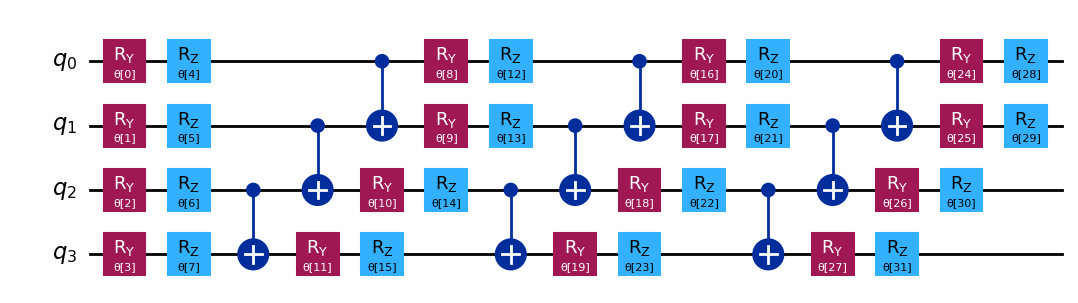

In [11]:
# MPL circuit visualization
ucc_ansatz.decompose().draw('mpl')
plt.show()

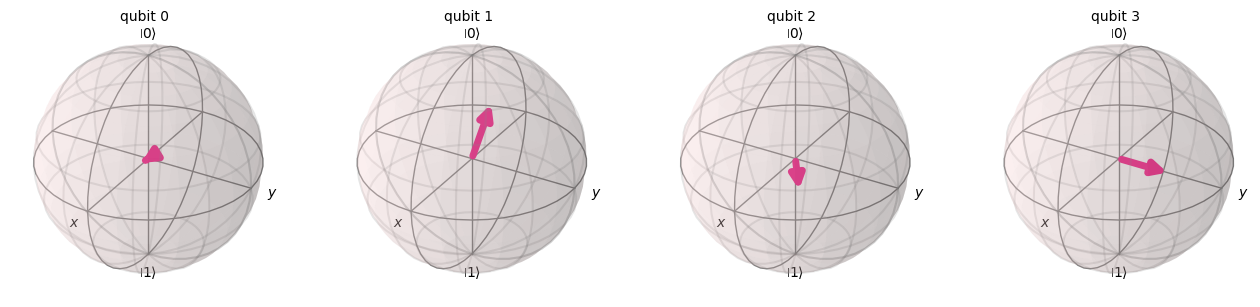

In [12]:
# Bloch multivector plot
plot_bloch_multivector(final_state.data)
plt.show()

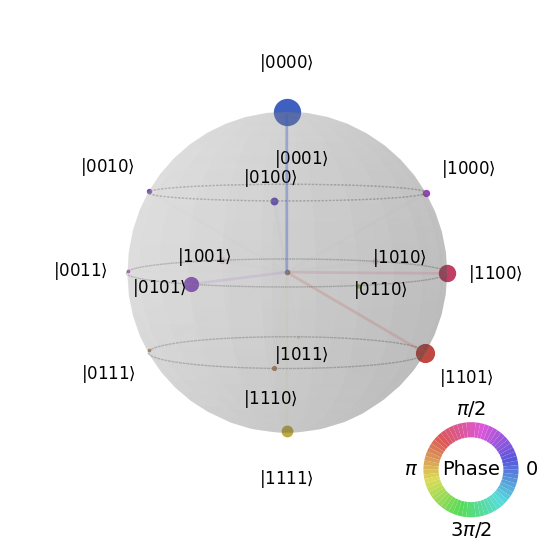

In [13]:
# Qsphere visualization
plot_state_qsphere(final_state.data)
plt.show()

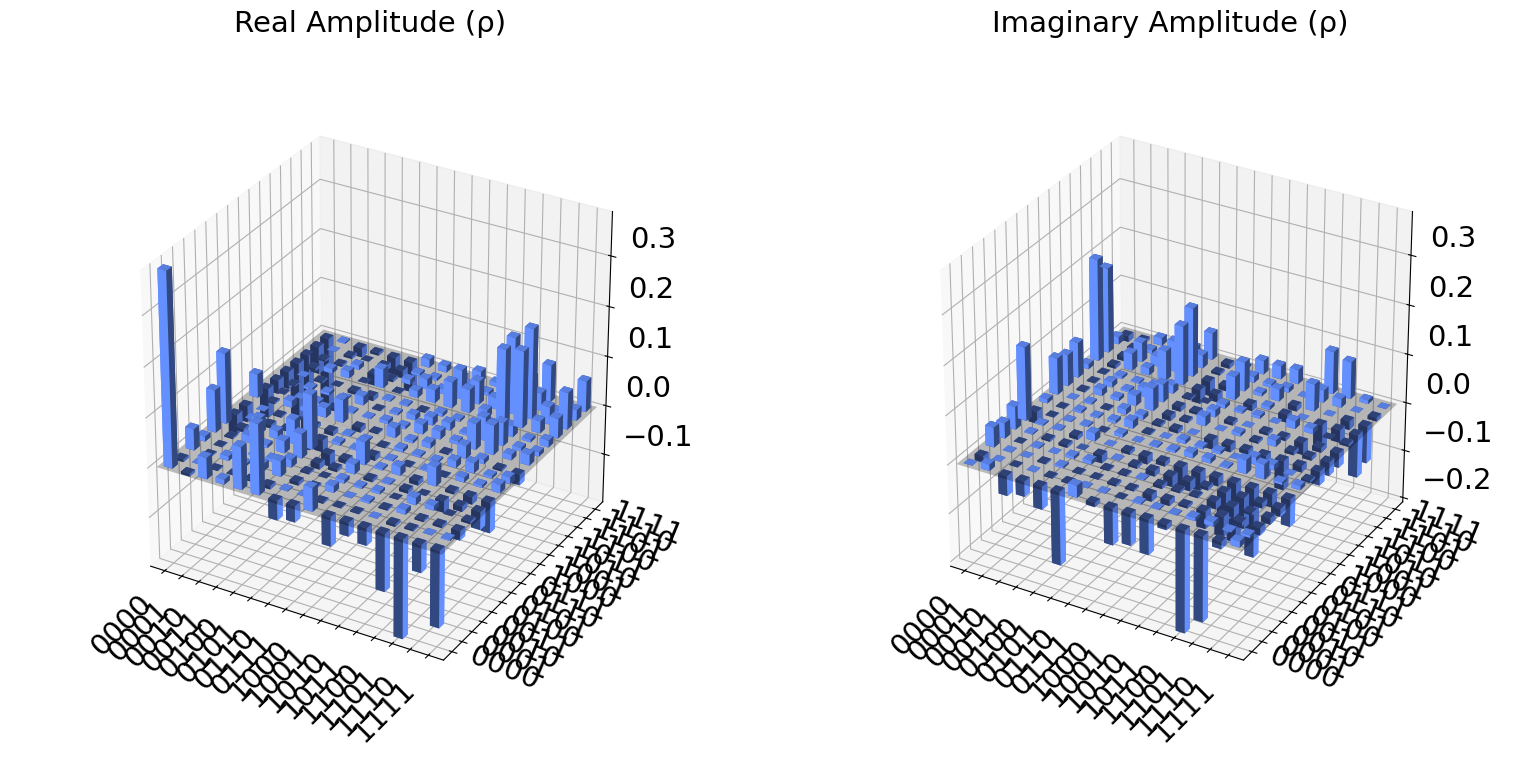

In [14]:
# State city visualization
plot_state_city(final_state.data)
plt.show()

In [15]:
# Partial trace for reduced density matrix
reduced_density_matrix = partial_trace(final_state, [0])

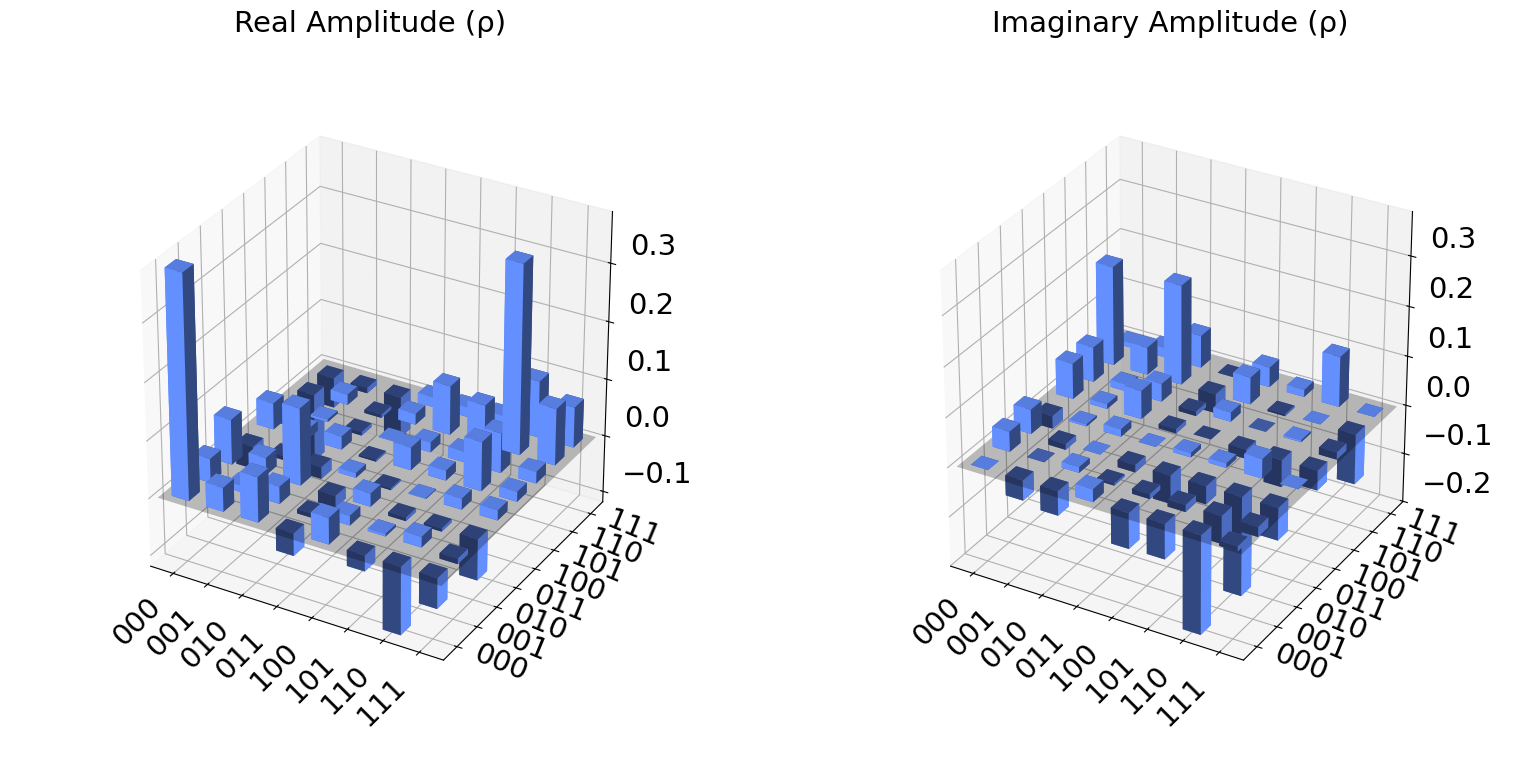

In [16]:
# State city visualization - partial trace
plot_state_city(reduced_density_matrix.data)
plt.show()